In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
df=pd.read_csv('listings_50_outliers_mexico.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26281 non-null  int64  
 1   listing_url                                   26281 non-null  object 
 2   last_scraped                                  26281 non-null  object 
 3   source                                        26281 non-null  object 
 4   name                                          26281 non-null  object 
 5   description                                   25513 non-null  object 
 6   neighborhood_overview                         15110 non-null  object 
 7   picture_url                                   26281 non-null  object 
 8   host_url                                      26281 non-null  object 
 9   host_name                                     26278 non-null 

In [267]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)



# Verificar la conversión
#df[['host_response_rate', 'host_acceptance_rate']].head()
df['host_is_superhost'].head()
df['price'].head(10)

0     4044.0
1    18000.0
2     2123.0
3     1236.0
4        NaN
5     4056.0
6      340.0
7     1777.0
8     4985.0
9     1150.0
Name: price, dtype: float64

In [7]:
df['host_is_superhost'].head(5)

0    False
1     True
2     True
3     True
4    False
Name: host_is_superhost, dtype: object

In [37]:
#df['host_is_superhost'] = df['host_is_superhost'].astype(int)

# Verificar la conversión
print(df['price'].unique())

[ 4044. 18000.  2123. ... 22347.  8897.  3125.]


In [18]:
print(df['review_scores_cleanliness'].unique())

[4.8  4.7  4.76 4.96 4.84 4.61 4.74 4.85 4.6  4.94 4.66 4.79 5.   4.71
 4.83 4.64 4.58 4.81 4.86 4.88 4.97 4.89 4.65 4.68 4.91 4.62 4.55 4.75
 4.9  4.5  4.92 4.41 4.51 4.72 4.56 4.69 4.95 4.78 4.98 4.39 4.67 4.4
 4.57 4.93 4.87 4.33 4.63 4.73 4.82 4.77 4.59 4.54 4.44 4.99 4.53 4.52
 4.47 4.36 4.42 4.45 4.49 4.48 4.43 4.46 4.37 4.38 4.32 4.35 4.34]


In [38]:
df_encoded = pd.get_dummies(df, columns=['property_type', 'room_type', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'], drop_first=True)

# Verificar el resultado
df_encoded.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,False,False,False,False,False,False,False,True,True,False
1,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,False,False,False,False,False,False,True,True,True,False
2,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,False,False,False,False,False,False,True,True,True,False
3,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,False,False,False,False,False,False,True,True,True,False
4,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,Fernando,...,False,False,False,False,True,False,False,True,False,False


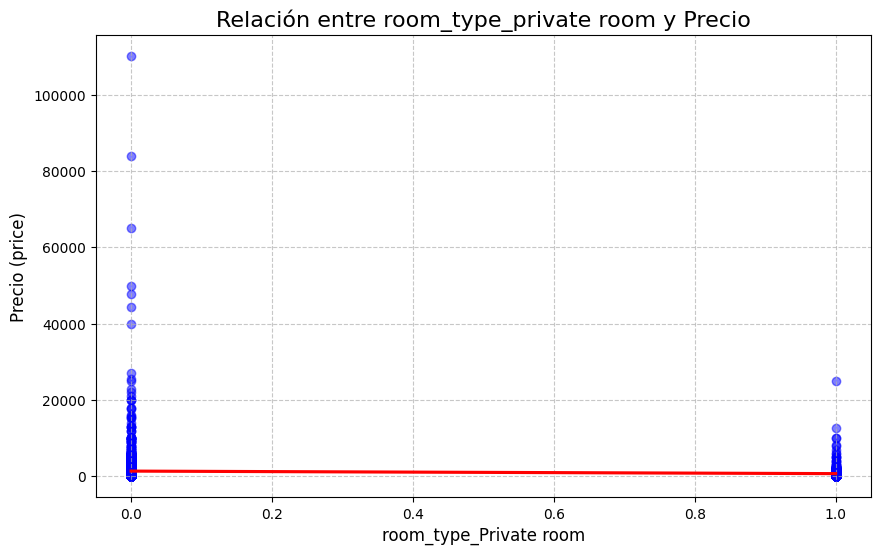

In [7]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [8]:
df_encoded

,Unnamed: 0,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,bathrooms_text,price,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",within a day,1.0,1.00,2.5 baths,0.0,...,False,False,False,False,False,False,False,True,True,False
1,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",within an hour,1.0,1.00,1 bath,3400.0,...,False,False,False,False,False,False,False,True,True,False
2,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",within a day,1.0,0.71,1 bath,586.0,...,False,False,False,False,True,False,False,True,True,False
3,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,1 bath,0.0,...,False,False,False,False,False,False,True,True,True,False
4,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,1 shared bath,0.0,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,10447,9/28/2024,Stian,9/12/2024,10,within a day,1.0,0.50,1 bath,810.0,...,False,False,False,False,False,False,False,True,False,True
10448,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",within a day,1.0,0.50,1 bath,738.0,...,False,False,False,False,False,False,False,True,True,False
10449,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,within a day,1.0,0.50,1 bath,900.0,...,False,False,False,False,False,False,False,False,True,False
10450,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",within a day,1.0,0.50,1 bath,800.0,...,False,False,False,False,False,False,False,True,False,False


In [21]:
X = df_encoded[['room_type_Private room']]  # Columnas codificadas de room_type
y = df_encoded['price']  # Variable dependiente

In [22]:
from sklearn.model_selection import train_test_split

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 759.34590009, 1405.49465753, 1405.49465753, ...,  759.34590009,
       1405.49465753, 1405.49465753])

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 3258875.572018517
Coeficiente de Determinación (R²): 0.01703044702811818


In [14]:
# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print(coeficientes)

# Intercepto
print(f'Intercepto: {model.intercept_}')

                 Variable  Coeficiente
0  room_type_Private room  -646.148757
Intercepto: 1405.494657534246


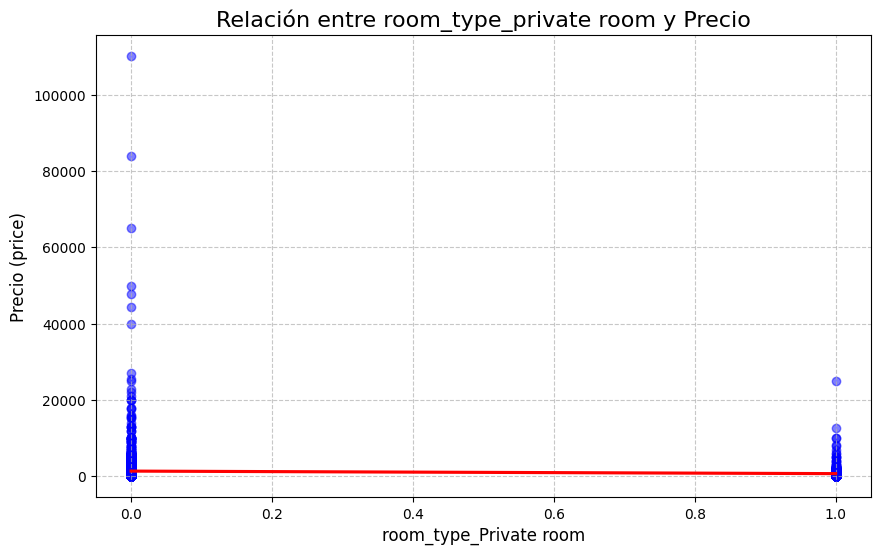

In [15]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

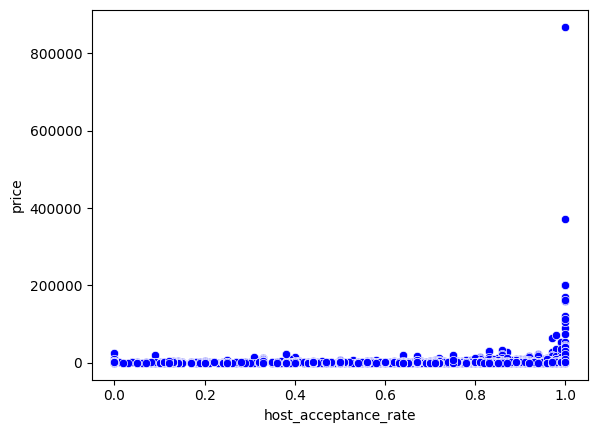

In [184]:
from turtle import color   
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)




In [185]:
Vars_Indep=df[['host_acceptance_rate']]
Vars_Dep=df['price']

In [186]:
print(Vars_Indep.isnull().sum())


host_acceptance_rate    2773
dtype: int64


In [187]:
Vars_Indep = Vars_Indep.dropna()

In [188]:
print(Vars_Indep.isnull().sum())


host_acceptance_rate    0
dtype: int64


In [189]:
Vars_Dep = Vars_Dep.loc[Vars_Indep.index] 


In [190]:
Vars_Indep = Vars_Indep.fillna(0)

In [191]:
print(Vars_Dep.isnull().sum())

2405


In [192]:
Vars_Dep=Vars_Dep.dropna()

In [193]:
print(Vars_Dep.isnull().sum())

0


In [194]:
Vars_Dep = Vars_Dep.fillna(0)

In [195]:
print(Vars_Dep.isnull().sum())

0


In [196]:
print("Vars_Indep:", Vars_Indep.shape)
print("Vars_Dep:", Vars_Dep.shape)

Vars_Indep: (23508, 1)
Vars_Dep: (21103,)


In [197]:
print(Vars_Indep.index)
print(Vars_Dep.index) 



Index([    1,     2,     3,     5,     6,     7,     8,     9,    10,    11,
       ...
       26271, 26272, 26273, 26274, 26275, 26276, 26277, 26278, 26279, 26280],
      dtype='int64', length=23508)
Index([    1,     2,     3,     5,     6,     7,     8,     9,    10,    11,
       ...
       26271, 26272, 26273, 26274, 26275, 26276, 26277, 26278, 26279, 26280],
      dtype='int64', length=21103)


In [198]:
Vars_Indep = Vars_Indep.loc[Vars_Dep.index]

In [199]:
print(Vars_Indep.shape)
print(Vars_Dep.shape)

(21103, 1)
(21103,)


In [200]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [201]:
type(model)

sklearn.linear_model._base.LinearRegression

Vars_Indep: (23508, 1)
Vars_Dep: (21103,)


In [202]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [55]:
Vars_Indep = Vars_Indep.dropna()

In [203]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1133.34818161]),
 'rank_': 1,
 'singular_': array([34.00664307]),
 'intercept_': 856.4961552804411}

In [268]:
print(df_encoded['host_acceptance_rate'].isnull().sum())


0


In [269]:
df_encoded['host_acceptance_rate'].fillna(df_encoded['host_acceptance_rate'].mean(), inplace=True)


C:\Users\hegbj\AppData\Local\Temp\ipykernel_26292\2143007715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['host_acceptance_rate'].fillna(df_encoded['host_acceptance_rate'].mean(), inplace=True)


In [270]:
print(df_encoded['host_acceptance_rate'].isnull().sum())

0


In [209]:
y_pred1=model.predict(X=df_encoded[['host_acceptance_rate']])
y_pred1

array([1867.07025378, 1899.17648236, 1491.17113698, ..., 1899.17648236,
       1989.84433689, 1989.84433689])

In [210]:
df_encoded.insert(0,'y_pred1',y_pred1)
df_encoded

,y_pred1,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1867.070254,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,...,False,False,False,False,False,False,False,True,True,False
1,1899.176482,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,...,False,False,False,False,False,False,True,True,True,False
2,1491.171137,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,...,False,False,False,False,False,False,True,True,True,False
3,1921.843446,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,False,False,False,False,False,False,True,True,True,False
4,1867.070254,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1989.844337,26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/369403303,...,False,False,False,False,True,False,False,True,True,True
26277,1989.844337,26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/525554527,...,False,False,False,False,False,False,False,True,True,True
26278,1899.176482,26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/293574406,...,False,False,False,False,False,True,False,True,True,True
26279,1989.844337,26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/35255741,...,False,False,False,False,False,False,True,True,True,True


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

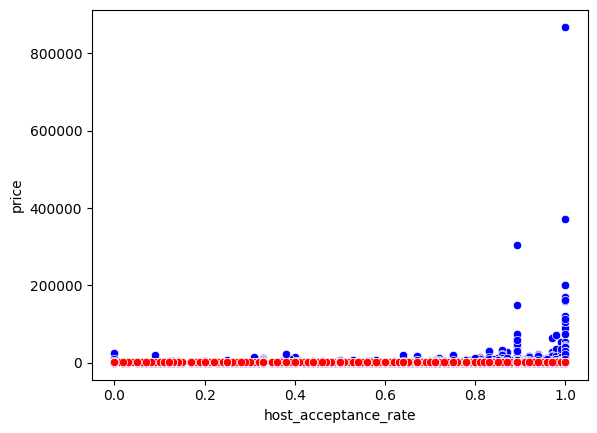

In [211]:

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_acceptance_rate',y='y_pred1',color='red',data=df_encoded)

In [221]:
print(df_encoded['price'].isnull().sum())

3815


In [222]:
df_encoded['price'].fillna(df_encoded['price'].mean(), inplace=True)

In [223]:
print(df_encoded['price'].isnull().sum())

0


<Axes: xlabel='host_is_superhost_True', ylabel='price'>

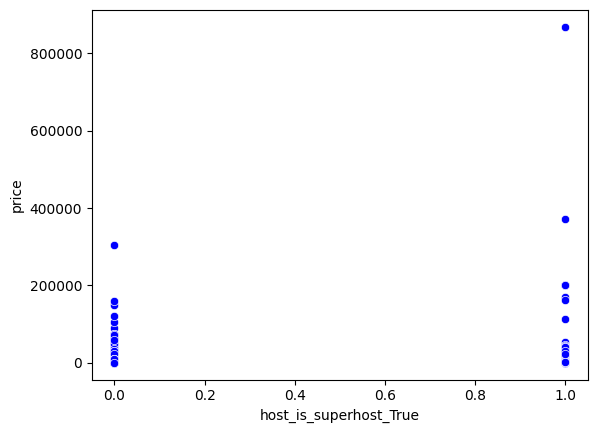

In [224]:
sns.scatterplot(x='host_is_superhost_True',y='price',color='blue',data=df_encoded)

In [225]:
df_encoded.head()


,y_pred1,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1867.070254,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,...,False,False,False,False,False,False,False,True,True,False
1,1899.176482,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,...,False,False,False,False,False,False,True,True,True,False
2,1491.171137,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,...,False,False,False,False,False,False,True,True,True,False
3,1921.843446,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,False,False,False,False,False,False,True,True,True,False
4,1867.070254,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,...,False,False,False,False,True,False,False,True,False,False


In [226]:
Vars_Indep=df_encoded[['host_is_superhost_True']]
Vars_Dep=df_encoded['price']

In [227]:
model=LinearRegression()


In [228]:
type(model)

sklearn.linear_model._base.LinearRegression

In [229]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [230]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost_True'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([420.65366443]),
 'rank_': 1,
 'singular_': array([78.73084591]),
 'intercept_': 1771.9159335315676}

In [232]:
y_pred2=model.predict(X=df_encoded[['host_is_superhost_True']])
y_pred2

array([1771.91593353, 2192.56959796, 2192.56959796, ..., 1771.91593353,
       2192.56959796, 2192.56959796])

In [233]:
df_encoded.insert(0,'y_pred2',y_pred2)
df_encoded

,y_pred2,y_pred1,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1771.915934,1867.070254,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,...,False,False,False,False,False,False,False,True,True,False
1,2192.569598,1899.176482,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,...,False,False,False,False,False,False,True,True,True,False
2,2192.569598,1491.171137,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,...,False,False,False,False,False,False,True,True,True,False
3,2192.569598,1921.843446,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,False,False,False,False,False,False,True,True,True,False
4,1771.915934,1867.070254,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1771.915934,1989.844337,26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,...,False,False,False,False,True,False,False,True,True,True
26277,1771.915934,1989.844337,26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,...,False,False,False,False,False,False,False,True,True,True
26278,1771.915934,1899.176482,26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,...,False,False,False,False,False,True,False,True,True,True
26279,2192.569598,1989.844337,26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,...,False,False,False,False,False,False,True,True,True,True


<Axes: xlabel='host_is_superhost_True', ylabel='price'>

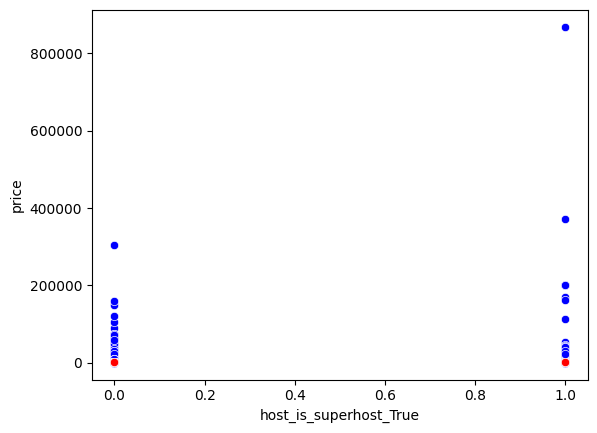

In [234]:
sns.scatterplot(x='host_is_superhost_True',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_is_superhost_True',y='y_pred2',color='red',data=df_encoded)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

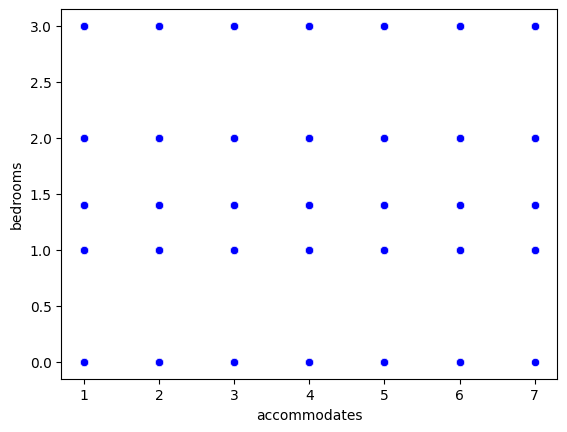

In [235]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)

In [236]:
Vars_Indep=df_encoded[['bedrooms']]
Vars_Dep=df_encoded['accommodates']

In [237]:

from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [238]:
type(model)

sklearn.linear_model._base.LinearRegression

In [239]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [240]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.49860388]),
 'rank_': 1,
 'singular_': array([103.63187042]),
 'intercept_': 0.8232034548647791}

In [241]:
y_pred3=model.predict(X=df_encoded[['bedrooms']])
y_pred3

array([2.32180733, 2.92124888, 3.82041121, ..., 2.32180733, 5.31901508,
       2.32180733])

In [242]:
df_encoded.insert(0,'y_pred3',y_pred3)
df_encoded

,y_pred3,y_pred2,y_pred1,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,2.321807,1771.915934,1867.070254,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",...,False,False,False,False,False,False,False,True,True,False
1,2.921249,2192.569598,1899.176482,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,...,False,False,False,False,False,False,True,True,True,False
2,3.820411,2192.569598,1491.171137,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,...,False,False,False,False,False,False,True,True,True,False
3,2.321807,2192.569598,1921.843446,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,...,False,False,False,False,False,False,True,True,True,False
4,3.820411,1771.915934,1867.070254,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,NaN,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,2.321807,1771.915934,1989.844337,26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",NaN,...,False,False,False,False,True,False,False,True,True,True
26277,3.820411,1771.915934,1989.844337,26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,NaN,...,False,False,False,False,False,False,False,True,True,True
26278,2.321807,1771.915934,1899.176482,26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,NaN,...,False,False,False,False,False,True,False,True,True,True
26279,5.319015,2192.569598,1989.844337,26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",...,False,False,False,False,False,False,True,True,True,True


<Axes: xlabel='accommodates', ylabel='bedrooms'>

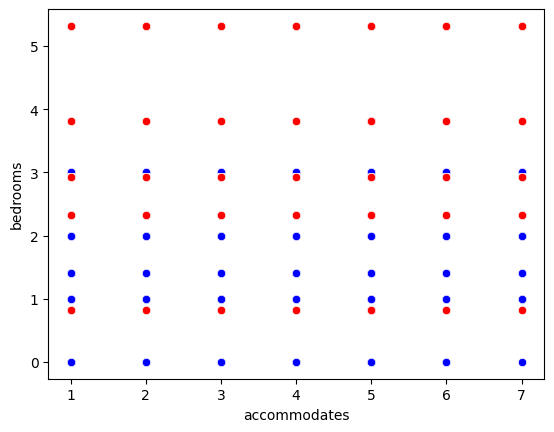

In [243]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)
sns.scatterplot(x='accommodates',y='y_pred3',color='red',data=df_encoded)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

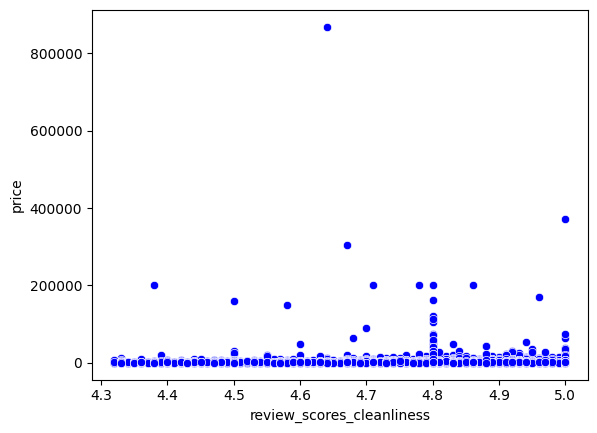

In [244]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)
#ns.scatterplot(x='speeding',y='price',color='red',data=df)

In [245]:
Vars_Indep=df_encoded[['review_scores_cleanliness']]
Vars_Dep=df_encoded['price']

In [246]:
model=LinearRegression()

In [247]:
type(model)

sklearn.linear_model._base.LinearRegression

In [248]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [249]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([599.79971832]),
 'rank_': 1,
 'singular_': array([23.92286029]),
 'intercept_': -960.8744832564964}

In [250]:
y_pred4=model.predict(X=df_encoded[['review_scores_cleanliness']])
y_pred4

array([1918.16416468, 1858.18419284, 1894.17217594, ..., 1918.16416468,
       1918.16416468, 1918.16416468])

In [251]:
df_encoded.insert(0,'y_pred4',y_pred4)
df_encoded

,y_pred4,y_pred3,y_pred2,y_pred1,Unnamed: 0,listing_url,last_scraped,source,name,description,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1918.164165,2.321807,1771.915934,1867.070254,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",...,False,False,False,False,False,False,False,True,True,False
1,1858.184193,2.921249,2192.569598,1899.176482,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,...,False,False,False,False,False,False,True,True,True,False
2,1894.172176,3.820411,2192.569598,1491.171137,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",...,False,False,False,False,False,False,True,True,True,False
3,2014.132120,2.321807,2192.569598,1921.843446,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,...,False,False,False,False,False,False,True,True,True,False
4,1918.164165,3.820411,1771.915934,1867.070254,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1918.164165,2.321807,1771.915934,1989.844337,26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",...,False,False,False,False,True,False,False,True,True,True
26277,1918.164165,3.820411,1771.915934,1989.844337,26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,...,False,False,False,False,False,False,False,True,True,True
26278,1918.164165,2.321807,1771.915934,1899.176482,26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,...,False,False,False,False,False,True,False,True,True,True
26279,1918.164165,5.319015,2192.569598,1989.844337,26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...",...,False,False,False,False,False,False,True,True,True,True


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

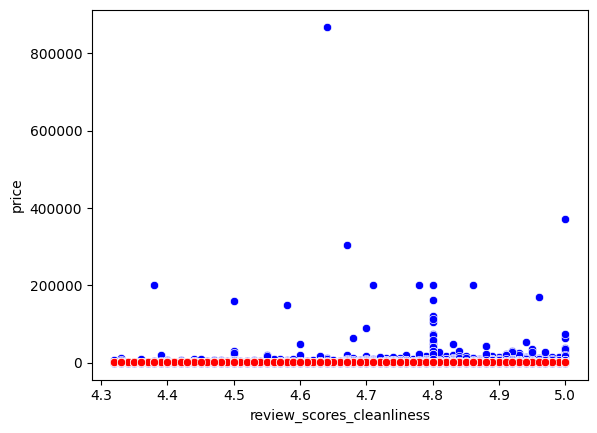

In [252]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='review_scores_cleanliness',y='y_pred4',color='red',data=df_encoded)

<Axes: xlabel='host_identity_verified_t', ylabel='price'>

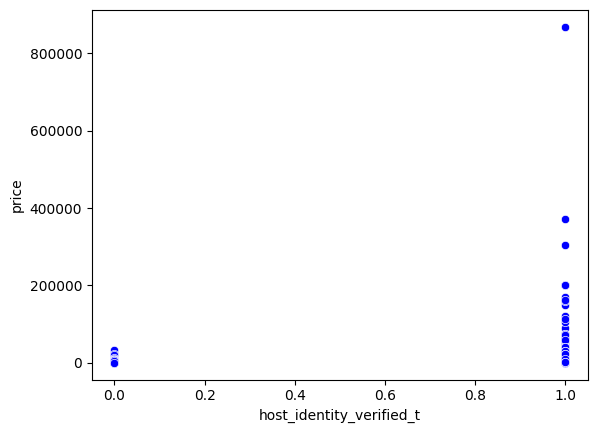

In [253]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)

In [254]:
Vars_Indep=df_encoded[['host_identity_verified_t']]
Vars_Dep=df_encoded['price']

In [255]:
model=LinearRegression()

In [256]:
type(model)

sklearn.linear_model._base.LinearRegression

In [257]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [258]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified_t'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-301.62043738]),
 'rank_': 1,
 'singular_': array([34.70030194]),
 'intercept_': 2219.3183653541882}

In [259]:
y_pred5=model.predict(X=df_encoded[['host_identity_verified_t']])
y_pred5

array([1917.69792798, 1917.69792798, 1917.69792798, ..., 1917.69792798,
       1917.69792798, 1917.69792798])

In [261]:
df_encoded.insert(0,'y_pred5',y_pred5)
df_encoded

,y_pred5,y_pred4,y_pred3,y_pred2,y_pred1,Unnamed: 0,listing_url,last_scraped,source,name,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1917.697928,1918.164165,2.321807,1771.915934,1867.070254,0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,...,False,False,False,False,False,False,False,True,True,False
1,1917.697928,1858.184193,2.921249,2192.569598,1899.176482,1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,...,False,False,False,False,False,False,True,True,True,False
2,1917.697928,1894.172176,3.820411,2192.569598,1491.171137,2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa",...,False,False,False,False,False,False,True,True,True,False
3,1917.697928,2014.132120,2.321807,2192.569598,1921.843446,3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,...,False,False,False,False,False,False,True,True,True,False
4,2219.318365,1918.164165,3.820411,1771.915934,1867.070254,4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1917.697928,1918.164165,2.321807,1771.915934,1989.844337,26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,...,False,False,False,False,True,False,False,True,True,True
26277,1917.697928,1918.164165,3.820411,1771.915934,1989.844337,26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,...,False,False,False,False,False,False,False,True,True,True
26278,1917.697928,1918.164165,2.321807,1771.915934,1899.176482,26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,...,False,False,False,False,False,True,False,True,True,True
26279,1917.697928,1918.164165,5.319015,2192.569598,1989.844337,26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,...,False,False,False,False,False,False,True,True,True,True


<Axes: xlabel='host_identity_verified_t', ylabel='price'>

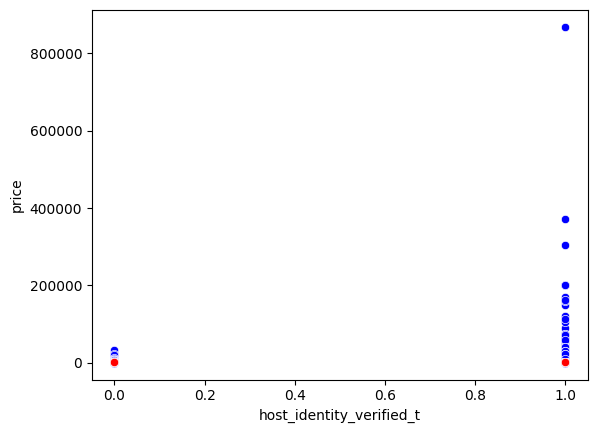

In [264]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_identity_verified_t',y='y_pred5',color='red',data=df_encoded)


In [295]:
sns.scatterplot(x='alcohol', y='total', color="blue", data=df_encoded)
sns.scatterplot(x='speeding', y='total', color="red", data=df_encoded)
sns.scatterplot(x='no_previous', y='total', color="yellow", data=df_encoded)

ValueError: Could not interpret value `alcohol` for parameter `x`

In [296]:
df_2=df_encoded[['host_id', 'host_acceptance_rate', 'host_is_superhost_True', 'host_total_listings_count' 
         , 'accommodates', 'bedrooms', 'price',  'reviews_per_month']]
df_2.head()

,host_id,host_acceptance_rate,host_is_superhost_True,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,153786,0.891671,False,1.0,2.0,1.0,4044.000000,1.50
1,196253,0.920000,True,13.0,3.0,1.4,18000.000000,0.40
2,334451,0.560000,True,4.0,4.0,2.0,2123.000000,0.31
3,212109,0.940000,True,4.0,2.0,1.0,1236.000000,0.84
4,647454,0.891671,False,4.0,2.0,2.0,1932.216015,1.50


In [297]:


df_2['host_is_superhost_True'] = df_2['host_is_superhost_True'].replace({'False': 0, 'True': 1})
df_2['host_is_superhost_True'] = df_2['host_is_superhost_True'].astype(int)


C:\Users\hegbj\AppData\Local\Temp\ipykernel_26292\3662663975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['host_is_superhost_True'] = df_2['host_is_superhost_True'].replace({'False': 0, 'True': 1})
C:\Users\hegbj\AppData\Local\Temp\ipykernel_26292\3662663975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['host_is_superhost_True'] = df_2['host_is_superhost_True'].astype(int)


In [298]:
print(df_2.isnull().sum())

host_id                      0
host_acceptance_rate         0
host_is_superhost_True       0
host_total_listings_count    0
accommodates                 0
bedrooms                     0
price                        0
reviews_per_month            0
dtype: int64


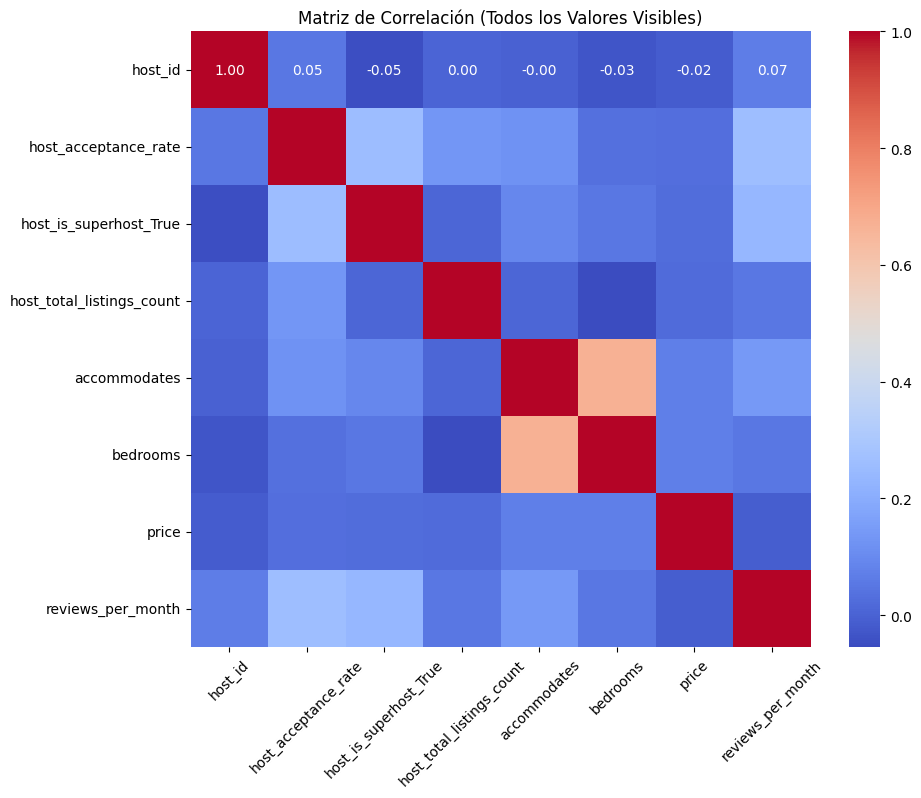

In [300]:
correlacion = df_2.corr().fillna(0)  

plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, annot_kws={"size": 10})
plt.title("Matriz de Correlación (Todos los Valores Visibles)")
plt.xticks(rotation=45)  # Rotar etiquetas para que no se sobrepongan
plt.yticks(rotation=0)
plt.show()

In [301]:
correlacion = df_2.corr().fillna(0)
print(correlacion)

                            host_id  host_acceptance_rate  \
host_id                    1.000000              0.050167   
host_acceptance_rate       0.050167              1.000000   
host_is_superhost_True    -0.050410              0.257982   
host_total_listings_count  0.003730              0.132318   
accommodates              -0.003223              0.118162   
bedrooms                  -0.031835              0.033203   
price                     -0.017492              0.029122   
reviews_per_month          0.066090              0.258485   

                           host_is_superhost_True  host_total_listings_count  \
host_id                                 -0.050410                   0.003730   
host_acceptance_rate                     0.257982                   0.132318   
host_is_superhost_True                   1.000000                   0.009023   
host_total_listings_count                0.009023                   1.000000   
accommodates                             0.092492 

<Axes: xlabel='host_id', ylabel='host_acceptance_rate'>

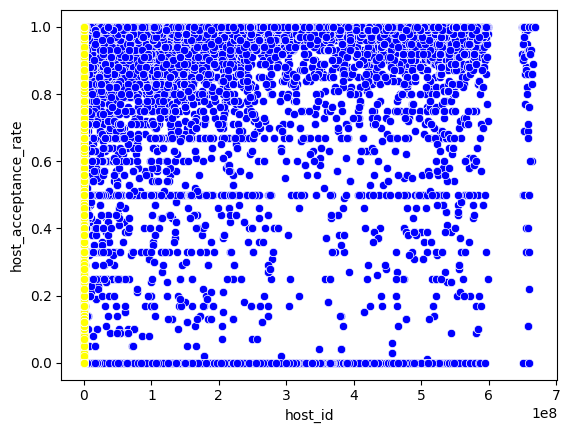

In [349]:
sns.scatterplot(x='host_id', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=df)
sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="yellow", data=df)

In [350]:
Vars_Indep= df_2[['host_id', 'price','accommodates']]
Var_Dep= df_2['host_acceptance_rate']

In [351]:
print(Vars_Indep.isnull().sum())


host_id         0
price           0
accommodates    0
dtype: int64


In [352]:
Vars_Indep = Vars_Indep.dropna()

In [353]:
Vars_Indep = Vars_Indep.fillna(0)

In [354]:
print(Vars_Dep.isnull().sum())

0


In [341]:
Vars_Indep = Vars_Indep.dropna()

In [355]:
model= LinearRegression()

In [356]:
type(model)

sklearn.linear_model._base.LinearRegression

In [357]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [358]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_id', 'price', 'accommodates'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([6.04593609e-11, 6.43794832e-07, 1.83971248e-02]),
 'rank_': 3,
 'singular_': array([3.08208309e+10, 1.22492814e+06, 2.31652538e+02]),
 'intercept_': 0.822618212985344}

In [359]:
model.score(Vars_Indep,Var_Dep)

0.016979180242535086

In [361]:
y_pred= model.predict(X=df_2[['host_id', 'price', 'accommodates']])
y_pred


array([0.86202527, 0.88940976, 0.89759371, ..., 0.95089642, 0.88195299,
       0.88013857])

In [362]:
print(model.coef_, model.intercept_)

[6.04593609e-11 6.43794832e-07 1.83971248e-02] 0.822618212985344


In [363]:
df_2.insert(0, 'y_pred', y_pred)
df_2

,y_pred,host_id,host_acceptance_rate,host_is_superhost_True,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,0.862025,153786,0.891671,0,1.0,2.0,1.0,4044.000000,1.50
1,0.889410,196253,0.920000,1,13.0,3.0,1.4,18000.000000,0.40
2,0.897594,334451,0.560000,1,4.0,4.0,2.0,2123.000000,0.31
3,0.860221,212109,0.940000,1,4.0,2.0,1.0,1236.000000,0.84
4,0.860696,647454,0.891671,0,4.0,2.0,2.0,1932.216015,1.50
...,...,...,...,...,...,...,...,...,...
26276,0.882236,369403303,1.000000,0,16.0,2.0,1.0,760.000000,1.50
26277,0.915312,525554527,1.000000,0,7.4,3.0,2.0,8897.000000,1.50
26278,0.950896,293574406,0.920000,0,8.0,6.0,1.0,227.000000,1.50
26279,0.881953,35255741,1.000000,1,7.4,3.0,3.0,3125.000000,1.50


In [364]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.016979180242535086

In [365]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.13030418351893036

<Axes: xlabel='bedrooms', ylabel='price'>

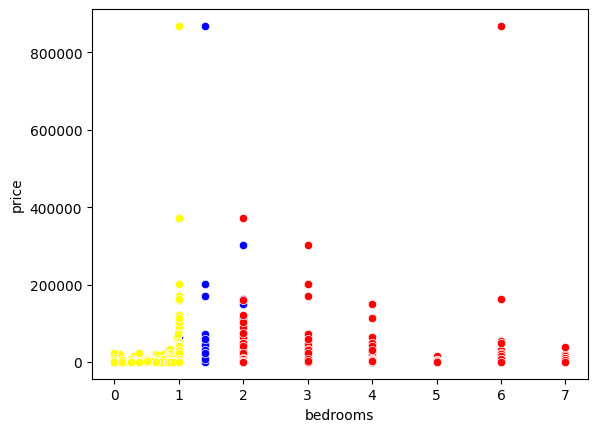

In [366]:
sns.scatterplot(x='bedrooms', y='price', color="blue", data=df)
sns.scatterplot(x='accommodates', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)

In [367]:
Vars_Indep= df_2[['host_acceptance_rate', 'bedrooms','accommodates']]
Var_Dep= df_2['price']

In [368]:
print(Vars_Indep.isnull().sum())

host_acceptance_rate    0
bedrooms                0
accommodates            0
dtype: int64


In [369]:
model= LinearRegression()

In [370]:
type(model)

sklearn.linear_model._base.LinearRegression

In [371]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [372]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'bedrooms', 'accommodates'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([760.6401358 , 475.56869149, 226.10817451]),
 'rank_': 3,
 'singular_': array([243.51459767,  73.57257966,  36.23171987]),
 'intercept_': -91.02563323133154}

In [373]:
model.score(Vars_Indep,Var_Dep)

0.006569056910967763

In [374]:
y_pred2= model.predict(X=df_2[['host_acceptance_rate', 'bedrooms','accommodates']])
y_pred2

array([1515.00042092, 1952.88398331, 2190.50292382, ..., 2440.98103023,
       2774.64510056, 1597.39954307])

In [375]:
print(model.coef_, model.intercept_)

[760.6401358  475.56869149 226.10817451] -91.02563323133154


In [376]:
df_2.insert(0, 'y_pred2', y_pred2)
df_2

,y_pred2,y_pred,host_id,host_acceptance_rate,host_is_superhost_True,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,1515.000421,0.862025,153786,0.891671,0,1.0,2.0,1.0,4044.000000,1.50
1,1952.883983,0.889410,196253,0.920000,1,13.0,3.0,1.4,18000.000000,0.40
2,2190.502924,0.897594,334451,0.560000,1,4.0,4.0,2.0,2123.000000,0.31
3,1551.761135,0.860221,212109,0.940000,1,4.0,2.0,1.0,1236.000000,0.84
4,1990.569112,0.860696,647454,0.891671,0,4.0,2.0,2.0,1932.216015,1.50
...,...,...,...,...,...,...,...,...,...,...
26276,1597.399543,0.882236,369403303,1.000000,0,16.0,2.0,1.0,760.000000,1.50
26277,2299.076409,0.915312,525554527,1.000000,0,7.4,3.0,2.0,8897.000000,1.50
26278,2440.981030,0.950896,293574406,0.920000,0,8.0,6.0,1.0,227.000000,1.50
26279,2774.645101,0.881953,35255741,1.000000,1,7.4,3.0,3.0,3125.000000,1.50


In [377]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.006569056910967763

In [378]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.08104971875933786

<Axes: xlabel='host_total_listings_count', ylabel='reviews_per_month'>

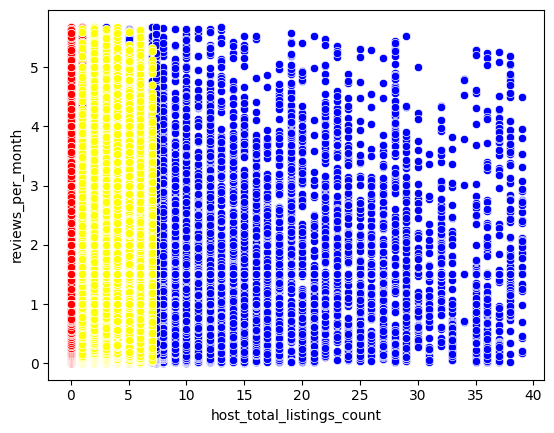

In [379]:
sns.scatterplot(x='host_total_listings_count', y='reviews_per_month', color="blue", data=df_2)
sns.scatterplot(x='host_is_superhost_True', y='reviews_per_month', color="red", data=df_2)
sns.scatterplot(x='accommodates', y='reviews_per_month', color="yellow", data=df_2)

In [382]:
Vars_Indep= df_2[['host_total_listings_count', 'host_is_superhost_True','accommodates']]
Var_Dep= df_2['reviews_per_month']

In [383]:
print(Vars_Indep.isnull().sum())

host_total_listings_count    0
host_is_superhost_True       0
accommodates                 0
dtype: int64


In [384]:
model= LinearRegression()

In [385]:
type(model)

sklearn.linear_model._base.LinearRegression

In [386]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [387]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count', 'host_is_superhost_True',
        'accommodates'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00721868, 0.56428817, 0.10138566]),
 'rank_': 3,
 'singular_': array([1256.54061359,  232.38134919,   78.34735456]),
 'intercept_': 0.9694150645294831}

In [388]:
model.score(Vars_Indep,Var_Dep)

0.07088284226437991

In [390]:
y_pred3= model.predict(X=df_2[['host_total_listings_count', 'host_is_superhost_True','accommodates']])
y_pred3

array([1.17940507, 1.93170305, 1.9681206 , ..., 1.63547847, 1.89127845,
       1.78989279])

In [391]:
print(model.coef_, model.intercept_)

[0.00721868 0.56428817 0.10138566] 0.9694150645294831


In [392]:
df_2.insert(0, 'y_pred3', y_pred3)
df_2

,y_pred3,y_pred2,y_pred,host_id,host_acceptance_rate,host_is_superhost_True,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,1.179405,1515.000421,0.862025,153786,0.891671,0,1.0,2.0,1.0,4044.000000,1.50
1,1.931703,1952.883983,0.889410,196253,0.920000,1,13.0,3.0,1.4,18000.000000,0.40
2,1.968121,2190.502924,0.897594,334451,0.560000,1,4.0,4.0,2.0,2123.000000,0.31
3,1.765349,1551.761135,0.860221,212109,0.940000,1,4.0,2.0,1.0,1236.000000,0.84
4,1.201061,1990.569112,0.860696,647454,0.891671,0,4.0,2.0,2.0,1932.216015,1.50
...,...,...,...,...,...,...,...,...,...,...,...
26276,1.287685,1597.399543,0.882236,369403303,1.000000,0,16.0,2.0,1.0,760.000000,1.50
26277,1.326990,2299.076409,0.915312,525554527,1.000000,0,7.4,3.0,2.0,8897.000000,1.50
26278,1.635478,2440.981030,0.950896,293574406,0.920000,0,8.0,6.0,1.0,227.000000,1.50
26279,1.891278,2774.645101,0.881953,35255741,1.000000,1,7.4,3.0,3.0,3125.000000,1.50


In [393]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07088284226437991

In [394]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.26623831855009134

In [ ]:
y_pred3= model.predict(X=df_2[['host_total_listings_count', 'reviews_per_month', 'accommodates']])
y_pred3

array([0.63268265, 0.61329483, 0.56559723, ..., 0.61872833, 0.61872833,
       0.62170253])

In [ ]:
Vars_Indep= df_2[['host_total_listings_count', 'host_is_superhost_True','accommodates']]
Var_Dep= df_2['price']